In [12]:
##IMPORTANDO

#from google.colab import drive
#drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
from scipy.stats import mannwhitneyu

import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score
from scipy.stats import mannwhitneyu
from scipy import stats

# Evitar avisos
import warnings
warnings.filterwarnings("ignore")


truncar = 4


# Carregue os dados do arquivo CSV com cabeçalho
df = pd.read_csv('student-por.csv')

display(df)
print(df.describe())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   
std      0.955717    1.0510

Valores totais: 


G3
11    104
10     97
13     82
12     72
14     63
15     49
16     36
9      35
8      35
17     29
18     15
0      15
7      10
6       3
19      2
1       1
5       1
Name: count, dtype: int64

<Axes: >

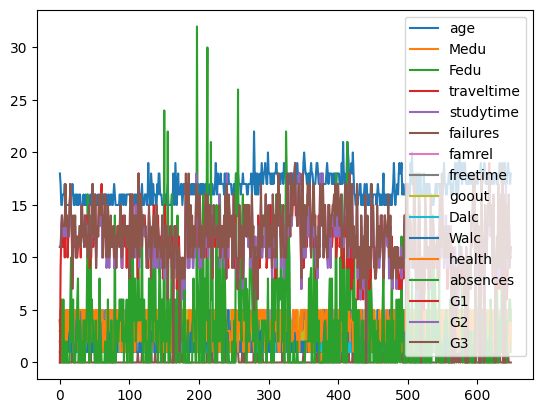

In [13]:

print('Valores totais: ')
display((df.iloc[:, -1]).value_counts())

df.plot()

In [39]:
# CLASSIFICADORES
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor






print(df[:])

# Codifique as variáveis categóricas
label_encoder = LabelEncoder()
for coluna in df[:]:
    df[coluna] = label_encoder.fit_transform(df[coluna])


loop = 3

best_accuracy = 0
best_paramsMLP = {}



for i in range(loop):

    print("\n\nExecução: ", i+1)
    


    
    x = df.iloc[:, :-1]  # Todos exceto a última coluna
    y = df.iloc[:, -1]   # última coluna

    # 70% para treinamento - 15% para validação - 15% para teste
    x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5, shuffle = True)
    x_validacao, x_teste, y_validacao, y_teste = train_test_split(x_teste, y_teste, test_size=0.5)


    ######################################## CALIBRAGEM !!!!########################################
    print("\nCalibragem-", i+1)

    #MLP
    erro_mae_MLP = []
    erro_mse_MLP = []
    erro_rmse_MLP = []
    print("MLP")
    param_grid = {
        'hidden_layer_sizes': [(10,), (20,), (30,)],
        'activation': ['relu', 'logistic', 'tanh', 'identity'],
        'solver': ['adam'],
        'max_iter': [100, 200, 300],
        'learning_rate_init': [0.001, 0.01, 0.1]
    }
    melhor_validacao = 0
    best_paramsMLP = {}
    for hidden_layer_sizes in param_grid['hidden_layer_sizes']:
        for activation in param_grid['activation']:
            for max_iter in param_grid['max_iter']:
                for learning_rate_init in param_grid['learning_rate_init']:
                    mlp = MLPRegressor(
                        hidden_layer_sizes=hidden_layer_sizes,
                        activation=activation,
                        solver='adam',
                        max_iter=max_iter,
                        learning_rate_init=learning_rate_init
                    )
                    mlp.fit(x_treino, y_treino)
                    opiniao = mlp.predict(x_validacao)
                    mse_validacao = mean_squared_error(y_validacao, opiniao)
                    if (mse_validacao > melhor_validacao):
                        best_paramsMLP = {
                            'hidden_layer_sizes': hidden_layer_sizes,
                            'activation': activation,
                            'max_iter': max_iter,
                            'learning_rate_init': learning_rate_init
                        }   
                    
                    #print(mse_validacao)
                


    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import accuracy_score



    #Random Forest
    print("Random Forest")
    param_grid_rf = {
        'n_estimators': [50, 100, 200],
        'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    erro_mae_RF = []
    erro_mse_RF = []
    erro_rmse_RF = []
    melhor_validacao = 0 
    best_params_rf = {}
    for n_estimators in param_grid_rf['n_estimators']:
        for criterion in param_grid_rf['criterion']:
            for max_depth in param_grid_rf['max_depth']:
                for min_samples_split in param_grid_rf['min_samples_split']:
                    for min_samples_leaf in param_grid_rf['min_samples_leaf']:
                        rf = RandomForestRegressor(
                            n_estimators=n_estimators,
                            criterion=criterion,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                        )
                        rf.fit(x_treino, y_treino)
                        opiniao = mlp.predict(x_validacao)
                        mse_validacao = mean_squared_error(y_validacao, opiniao)
                        # Verifique se a acurácia é a melhor até agora
                        if mse_validacao > melhor_validacao:
                            best_params_rf = {
                                'n_estimators': n_estimators,
                                'criterion': criterion,
                                'max_depth': max_depth,
                                'min_samples_split': min_samples_split,
                                'min_samples_leaf': min_samples_leaf
                            }


    


    ######################################## TREINAMENTO  ########################################
    print("\nTreinamento", i+1)

    #MLP
    print("MLP")
    mlp = MLPRegressor(
                        hidden_layer_sizes=best_paramsMLP['hidden_layer_sizes'],
                        activation=best_paramsMLP['activation'],
                        solver='adam',
                        max_iter=best_paramsMLP['max_iter'],
                        learning_rate_init=best_paramsMLP['learning_rate_init']
                    )
    mlp.fit(x_treino, y_treino)
    opiniao = mlp.predict(x_teste)
    erro_mae_MLP.append( mean_absolute_error(y_teste, opiniao) )
    erro_mse_MLP.append( mean_squared_error(y_teste, opiniao) )
    erro_rmse_MLP.append((np.sqrt(mean_squared_error(y_teste, opiniao))))

    # Random Forest
    print("Random Forest")
    rf = RandomForestRegressor(
                        n_estimators=best_params_rf['n_estimators'],
                        criterion=best_params_rf['criterion'],
                        max_depth=best_params_rf['max_depth'],
                        min_samples_split=best_params_rf['min_samples_split'],
                        min_samples_leaf=best_params_rf['min_samples_leaf'],
                        random_state=42  # Pode ajustar ou remover conforme necessário
                    )

    rf.fit(x_treino, y_treino)
    opiniao = rf.predict(x_teste)
    erro_mae_RF.append( mean_absolute_error(y_teste, opiniao) )
    erro_mse_RF.append( mean_squared_error(y_teste, opiniao) )
    erro_rmse_RF.append((np.sqrt(mean_squared_error(y_teste, opiniao))))











     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0    3        1        0        0     4     4     0     4  ...   
1         0    0    2        1        0        1     1     1     0     2  ...   
2         0    0    0        1        1        1     1     1     0     2  ...   
3         0    0    0        1        0        1     4     2     1     3  ...   
4         0    0    1        1        0        1     3     3     2     2  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
644       1    0    4        0        0        1     2     3     3     2  ...   
645       1    0    3        1        1        1     3     1     4     3  ...   
646       1    0    3        1        0        1     1     1     2     2  ...   
647       1    1    2        1        1        1     3     1     3     3  ...   
648       1    1    3        0        1        1     3     2     3     2  ...   

     famrel  freetime  goou

In [ ]:
# CLASSIFICADORES
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor






print(df[:])

# Codifique as variáveis categóricas
label_encoder = LabelEncoder()
for coluna in df[:]:
    df[coluna] = label_encoder.fit_transform(df[coluna])


loop = 3

best_accuracy = 0
best_paramsMLP = {}



for i in range(loop):

    print("\n\nExecução: ", i+1)
    


    
    x = df.iloc[:, :-1]  # Todos exceto a última coluna
    y = df.iloc[:, -1]   # última coluna

    # 70% para treinamento - 15% para validação - 15% para teste
    x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.5, shuffle = True)
    x_validacao, x_teste, y_validacao, y_teste = train_test_split(x_teste, y_teste, test_size=0.5)


    ######################################## CALIBRAGEM !!!!########################################
    print("\nCalibragem-", i+1)



    #Random Forest
    print("Random Forest")
    param_grid_rf = {
        'n_estimators': [50, 100, 200],
        'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    erro_mae_RF = []
    erro_mse_RF = []
    erro_rmse_RF = []
    melhor_validacao = 0 
    best_params_rf = {}
    for n_estimators in param_grid_rf['n_estimators']:
        for criterion in param_grid_rf['criterion']:
            for max_depth in param_grid_rf['max_depth']:
                for min_samples_split in param_grid_rf['min_samples_split']:
                    for min_samples_leaf in param_grid_rf['min_samples_leaf']:
                        rf = RandomForestRegressor(
                            n_estimators=n_estimators,
                            criterion=criterion,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                        )
                        rf.fit(x_treino, y_treino)
                        opiniao = mlp.predict(x_validacao)
                        mse_validacao = mean_squared_error(y_validacao, opiniao)
                        # Verifique se a acurácia é a melhor até agora
                        if mse_validacao > melhor_validacao:
                            best_params_rf = {
                                'n_estimators': n_estimators,
                                'criterion': criterion,
                                'max_depth': max_depth,
                                'min_samples_split': min_samples_split,
                                'min_samples_leaf': min_samples_leaf
                            }


    


    ######################################## TREINAMENTO  ########################################
    print("\nTreinamento", i+1)

    # Random Forest
    print("Random Forest")
    rf = RandomForestRegressor(
                        n_estimators=best_params_rf['n_estimators'],
                        criterion=best_params_rf['criterion'],
                        max_depth=best_params_rf['max_depth'],
                        min_samples_split=best_params_rf['min_samples_split'],
                        min_samples_leaf=best_params_rf['min_samples_leaf'],
                        random_state=42  # Pode ajustar ou remover conforme necessário
                    )

    rf.fit(x_treino, y_treino)
    opiniao = rf.predict(x_teste)
    erro_mae_RF.append( mean_absolute_error(y_teste, opiniao) )
    erro_mse_RF.append( mean_squared_error(y_teste, opiniao) )
    erro_rmse_RF.append((np.sqrt(mean_squared_error(y_teste, opiniao))))









